<a href="https://colab.research.google.com/github/alexguttlein/OrgaDatos_TP2_MachineLearning/blob/main/TP2_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [148]:
sales_train = pd.read_csv('sales_train.csv')
item_categories = pd.read_csv('item_categories.csv')
items = pd.read_csv('items.csv')
shops = pd.read_csv('shops.csv')

# Análisis inicial de los datasets

## Campos de datasets

In [149]:
sales_train.head(2)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.0,1.0
1,03.01.2013,0,25,2552,899.0,1.0


In [150]:
item_categories.head(2)

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1


In [151]:
items.head(2)

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76


In [152]:
shops.head(2)

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1


## Unión de datasets

In [153]:
# se unen 'sales_train' con 'items' usando 'item_id'
merged = pd.merge(sales_train, items, on='item_id', how='outer')
merged.head(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id
0,02.01.2013,0.0,59.0,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37
1,23.01.2013,0.0,24.0,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37
2,20.01.2013,0.0,27.0,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37
3,02.01.2013,0.0,25.0,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37
4,03.01.2013,0.0,25.0,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37


In [154]:
# se une el resultante anterior con 'item_categories' usando 'item_category_id'
merged = pd.merge(merged, item_categories, on='item_category_id', how='outer')
merged.head(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name
0,02.01.2013,0.0,59.0,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,23.01.2013,0.0,24.0,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
2,20.01.2013,0.0,27.0,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
3,02.01.2013,0.0,25.0,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
4,03.01.2013,0.0,25.0,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray


In [155]:
# se une el resultante anterior con 'shops' usando 'shop_id'
merged = pd.merge(merged, shops, on='shop_id', how='outer')
merged.head(5)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
0,02.01.2013,0.0,59.0,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
1,26.04.2013,3.0,59.0,944,150.0,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
2,26.06.2013,5.0,59.0,944,199.5,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
3,20.07.2013,6.0,59.0,944,199.5,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
4,14.09.2013,8.0,59.0,944,299.0,2.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""


## Limpieza de dataset

In [156]:
merged.isna().sum()

date                  363
date_block_num        363
shop_id               363
item_id                 0
item_price            363
item_cnt_day          363
item_name               0
item_category_id        0
item_category_name      0
shop_name             363
dtype: int64

In [157]:
# se reemplazan los NaN de 'item_cnt_day' por 0
merged['item_cnt_day'].fillna(0, inplace=True)

In [158]:
merged.isna().sum()

date                  363
date_block_num        363
shop_id               363
item_id                 0
item_price            363
item_cnt_day            0
item_name               0
item_category_id        0
item_category_name      0
shop_name             363
dtype: int64

In [159]:
merged.count()

date                  2935849
date_block_num        2935849
shop_id               2935849
item_id               2936212
item_price            2935849
item_cnt_day          2936212
item_name             2936212
item_category_id      2936212
item_category_name    2936212
shop_name             2935849
dtype: int64

In [160]:
# se valida que los datos NaN provienen de los mismos 363 registros
merged.loc[merged['shop_id'].isna() | merged['shop_name'].isna() | merged['item_price'].isna() | merged['date'].isna() | merged['date_block_num'].isna()]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
2899288,NaN,NaN,NaN,13805,NaN,0.0,ЛЕВША (BD),37,Кино - Blu-Ray,NaN
2899289,NaN,NaN,NaN,14648,NaN,0.0,МИССИЯ НЕВЫПОЛНИМА ПЛЕМЯ ИЗГОЕВ (2BD),37,Кино - Blu-Ray,NaN
2899290,NaN,NaN,NaN,19775,NaN,0.0,ТРАНСФОРМЕРЫ (4BD),37,Кино - Blu-Ray,NaN
2899291,NaN,NaN,NaN,1253,NaN,0.0,ADELE 25 LP,58,Музыка - Винил,NaN
2899292,NaN,NaN,NaN,1679,NaN,0.0,BILLY`S BAND Парижские сезоны LP,58,Музыка - Винил,NaN
...,...,...,...,...,...,...,...,...,...,...
2899646,NaN,NaN,NaN,14972,NaN,0.0,Манга Переживая юность,47,"Книги - Комиксы, манга",NaN
2899647,NaN,NaN,NaN,8545,NaN,0.0,Артбук The Art Of Bubble,42,"Книги - Артбуки, энциклопедии",NaN
2899648,NaN,NaN,NaN,8549,NaN,0.0,Артбук Мир игры Rise Of The Tomb Raider,42,"Книги - Артбуки, энциклопедии",NaN
2899649,NaN,NaN,NaN,8551,NaN,0.0,Артбук Мир игры Total War,42,"Книги - Артбуки, энциклопедии",NaN


In [161]:
# se filtran los 363 registros que contienen datos NaN
reg_nan = merged.loc[merged['shop_id'].isna() | merged['shop_name'].isna() | merged['item_price'].isna() | merged['date'].isna() | merged['date_block_num'].isna()]

In [162]:
# se eliminan los 363 registros con datos NaN ya que se considera que no va a afectar el resultado del analisis
merged.drop(reg_nan.index, inplace=True)

In [163]:
# se verifica que no quedan registros con valores NaN
merged.isna().sum()

date                  0
date_block_num        0
shop_id               0
item_id               0
item_price            0
item_cnt_day          0
item_name             0
item_category_id      0
item_category_name    0
shop_name             0
dtype: int64

In [164]:
# se verifica que hay registros con cantidad de ventas negativas
item_cnt_day_negativo = merged.loc[merged['item_cnt_day'] < 0]
item_cnt_day_negativo['item_cnt_day'].count()

7356

In [165]:
# se reemplaza las ventas negativas por 0
merged.loc[merged['item_cnt_day'] < 0, 'item_cnt_day'] = 0

# Visualizaciones

In [166]:
visu = merged.copy()

In [167]:
# convierto la columna 'date' a datetime
visu['date'] = pd.to_datetime(visu['date'], format='%d.%m.%Y')

# se agrega feature de dia de la semana
visu['day_of_week'] = visu['date'].dt.dayofweek

# se agregar columna que indique si es día laboral o fin de semana
# 0 para día laboral (lunes a viernes), 1 para fin de semana (sábado y domingo)
visu['is_weekend'] = visu['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

## Pieplot

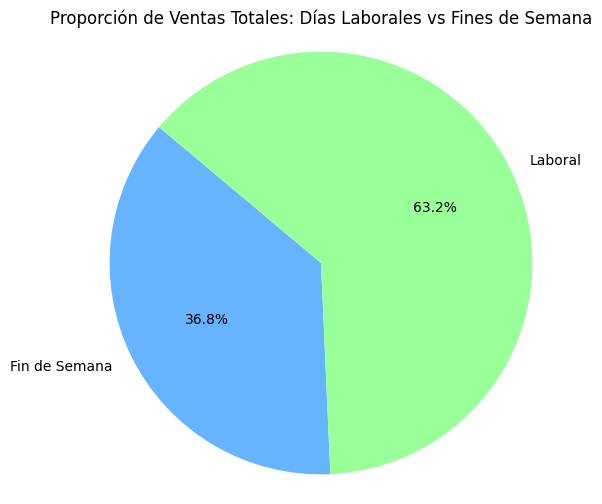

In [168]:
# se ve la proporcion de ventas entre semana vs findes
visu['is_weekend_label'] = visu['is_weekend'].map({0: 'Laboral', 1: 'Fin de Semana'})

ventas_totales = visu.groupby('is_weekend_label')['item_cnt_day'].sum()

plt.figure(figsize=(6, 6))
plt.pie(ventas_totales, labels=ventas_totales.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99'])
plt.title('Proporción de Ventas Totales: Días Laborales vs Fines de Semana')
plt.axis('equal')
plt.show()

## Barplots

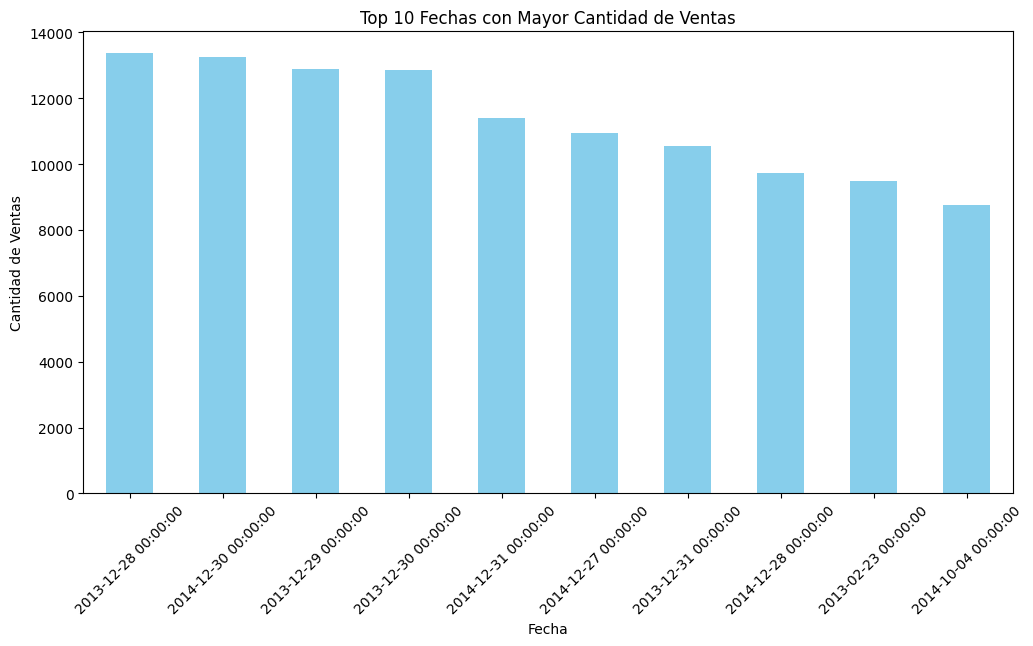

In [169]:
# fechas con mayor cantidad de articulos vendidos
fechas_top_ventas = visu.groupby('date')['item_cnt_day'].sum().sort_values(ascending=False).head(10)

# barplot para las 10 fechas con mayor cantidad de ventas
plt.figure(figsize=(12, 6))
fechas_top_ventas.plot(kind='bar', color='skyblue')
plt.title('Top 10 Fechas con Mayor Cantidad de Ventas')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Ventas')
plt.xticks(rotation=45)
plt.show()

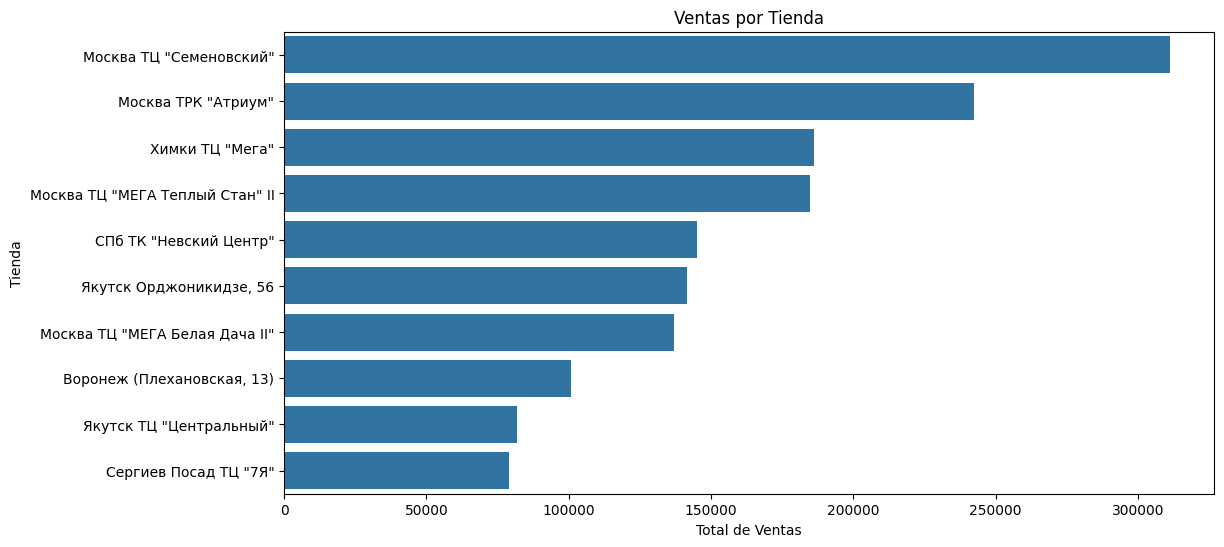

In [170]:
# barplot de ventas por tienda
plt.figure(figsize=(12, 6))
ventas_por_tienda = visu.groupby('shop_name')['item_cnt_day'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=ventas_por_tienda.values, y=ventas_por_tienda.index)
plt.title('Ventas por Tienda')
plt.xlabel('Total de Ventas')
plt.ylabel('Tienda')
plt.show()

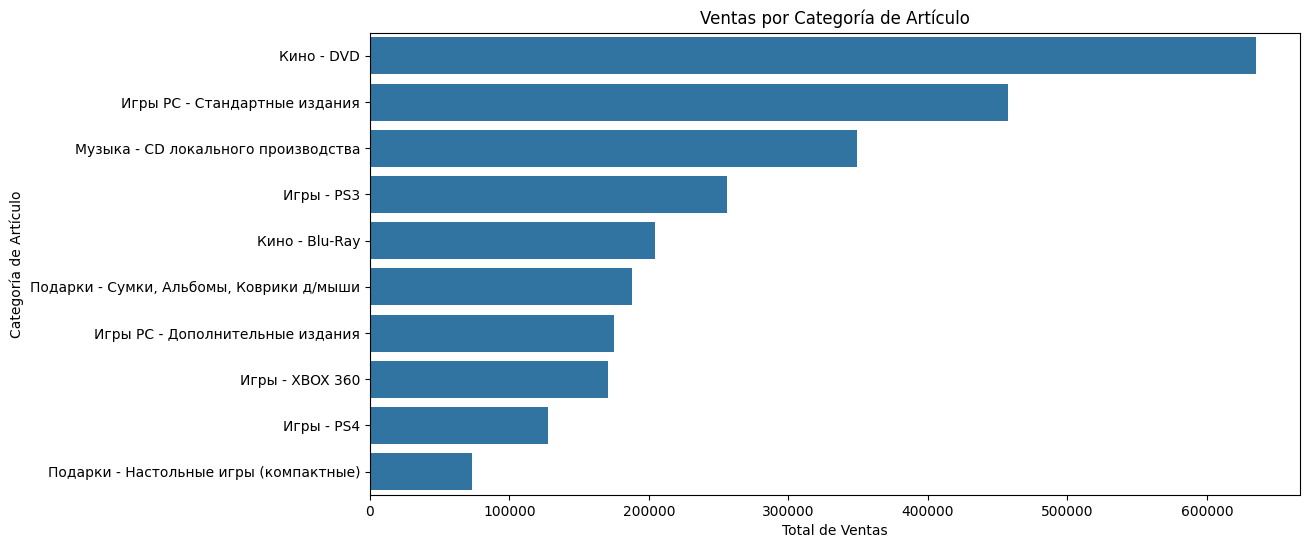

In [171]:
# barplot de ventas por categoría de artículo
plt.figure(figsize=(12, 6))
ventas_por_categoria = visu.groupby('item_category_name')['item_cnt_day'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=ventas_por_categoria.values, y=ventas_por_categoria.index)
plt.title('Ventas por Categoría de Artículo')
plt.xlabel('Total de Ventas')
plt.ylabel('Categoría de Artículo')
plt.show()

# Regresor Lineal

In [172]:
df = merged.copy()

In [173]:
# veo que columnas son categóricas
df.dtypes

date                   object
date_block_num        float64
shop_id               float64
item_id                 int64
item_price            float64
item_cnt_day          float64
item_name              object
item_category_id        int64
item_category_name     object
shop_name              object
dtype: object

In [174]:
# elimino columnas categóricas que se consideran irrelevantes por tener id asociado
df.drop(['date', 'item_name', 'item_category_name', 'shop_name'], axis=1, inplace=True)

In [175]:
# se separa la variable a predecir
X = df.drop(['item_cnt_day'], axis=1)
y = df['item_cnt_day']

In [176]:
# se dividen los datos en train y test
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=27)

In [177]:
# se crea una instancia de regresión lineal y se entrena el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [178]:
# se hacen predicciones en el conjunto de prueba
y_pred = modelo.predict(X_validation)

In [179]:
# se evalúa el modelo utilizando la métrica MSE
mse = mean_squared_error(y_validation, y_pred)
mse

4.514809783831491